# Project 1 - OpenData Octopi

#### This Jupyter Notebook will show changes and code written by Nico. 

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import json

In [2]:
opendata = pd.read_csv("Resources/odb_2014.csv")
egov = pd.read_csv("Resources/EGOV_DATA_2014.csv")

In [3]:
print(opendata.dtypes)
print(egov.dtypes)

Unnamed: 0                                int64
Year                                      int64
Region                                   object
ISO2                                     object
ISO3                                     object
ODB-Rank                                  int64
Country                                  object
ODB-Score-Scaled                        float64
Readiness-Scaled                          int64
Implementation-Innovation-Scaled          int64
Implementation-Social-Scaled              int64
Implementation-Accountability-Scaled      int64
Implementation-Rank                       int64
Impact-Political-Scaled                   int64
Impact-Social-Scaled                      int64
Impact-Economic-Scaled                    int64
Impact-Rank                               int64
Cluster-Group                            object
dtype: object
Survey Year                                 int64
Country Name                               object
E-Government Rank     

In [4]:
opendata["Country"] = opendata["Country"].astype(str)
opendata["Country"] = opendata["Country"].str.strip()
egov["Country Name"] = egov["Country Name"].astype(str)
egov["Country Name"] = egov["Country Name"].str.strip()

In [5]:
#opendata


In [6]:
merged = pd.merge(opendata, egov, left_on="Country", right_on="Country Name", how="inner")

merged

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Rank,Cluster-Group,Survey Year,Country Name,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,...,4,High capacity,2014,Sweden,14,0.82250,0.60784,0.70078,0.8802,0.88656
1,3,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,5,High capacity,2014,France,4,0.89384,0.96078,1.00000,0.8812,0.80029
2,4,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,...,14,High capacity,2014,New Zealand,9,0.86436,0.78431,0.84251,1.0000,0.75057
3,5,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,13,High capacity,2014,Netherlands,5,0.88966,1.00000,0.92913,0.9224,0.81751
4,6,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,...,8,High capacity,2014,Norway,13,0.83572,0.68627,0.75590,0.9380,0.81328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,81,2014,Middle East & North Africa,YE,YEM,82,Yemen,5.80,12,8,...,51,Capacity constrained,2014,Yemen,150,0.27199,0.27450,0.30708,0.3840,0.12486
75,82,2014,Sub-Saharan Africa,CM,CMR,83,Cameroon,3.77,11,6,...,51,Capacity constrained,2014,Cameroon,144,0.27823,0.15686,0.19685,0.5421,0.09579
76,83,2014,Sub-Saharan Africa,ML,MLI,84,Mali,3.30,19,2,...,51,Capacity constrained,2014,Mali,181,0.16335,0.15686,0.13385,0.2212,0.13501
77,84,2014,Latin America & Caribbean,HT,HTI,85,Haiti,1.19,5,4,...,65,Capacity constrained,2014,Haiti,176,0.18086,0.17647,0.11023,0.3372,0.09521


In [7]:
merged = merged.drop(columns=["Country Name"])

In [8]:
x = merged["E-Government Index"]
y = merged["ODB-Score-Scaled"]

slope, intercept, r_value, p_value, std_err = linregress(x,y)

regress_line = intercept + x*slope
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

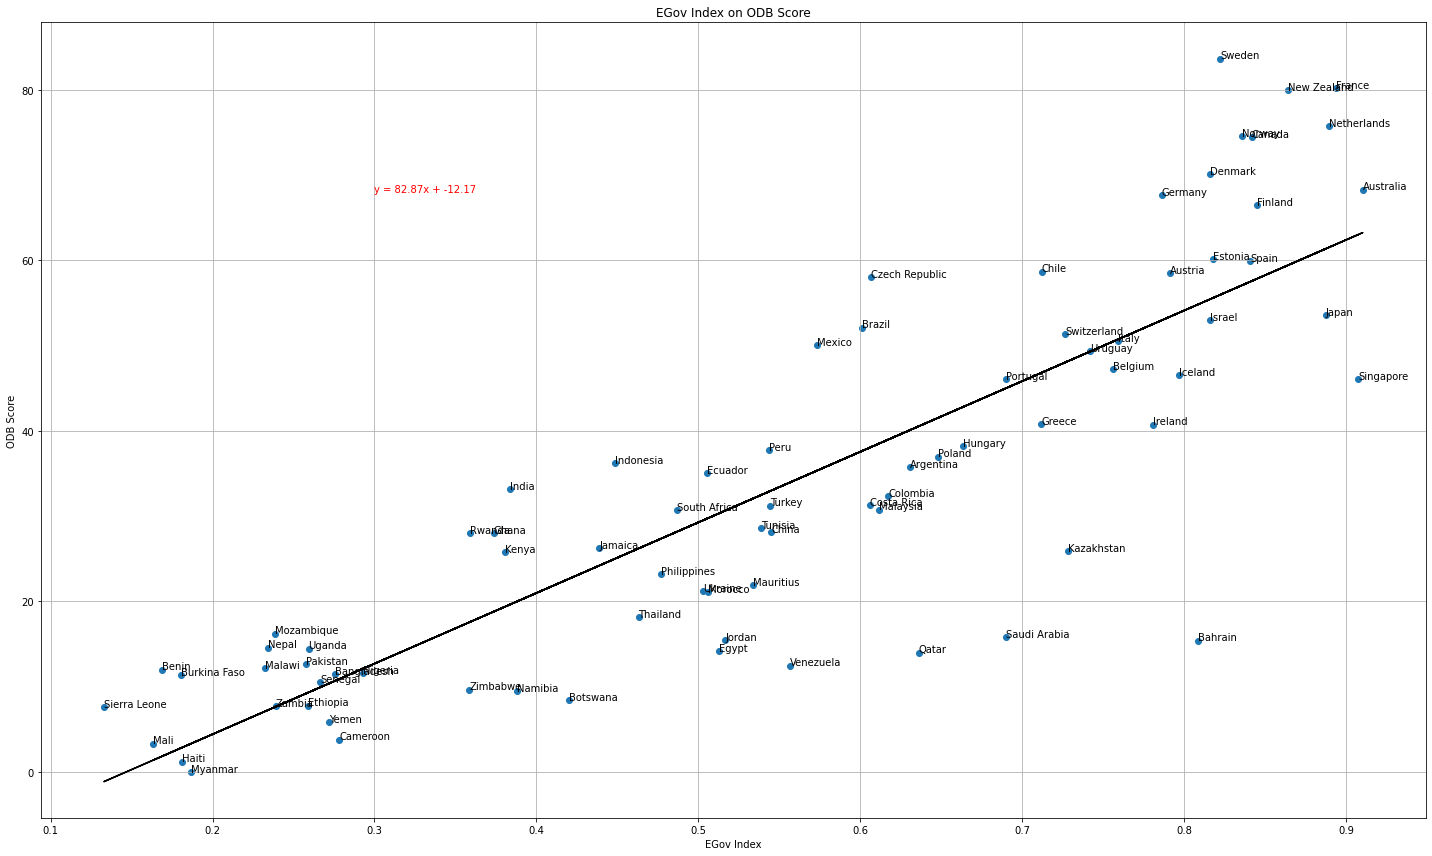

In [9]:
names = merged["Country"]

fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(x,y, label=names);
ax.plot(x, regress_line, color="black");
ax.annotate(line_eq,(0.3,68),fontsize=10,color="red");
ax.set(title="EGov Index on ODB Score",
      xlabel="EGov Index",
      ylabel="ODB Score");
for i, label in enumerate(names):
    ax.annotate(label, (x[i], y[i]));
ax.grid();
fig.tight_layout();

In [10]:
import statsmodels.api as sm
results = sm.OLS(y,sm.add_constant(x)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       ODB-Score-Scaled   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     194.8
Date:                Mon, 10 May 2021   Prob (F-statistic):           8.73e-23
Time:                        20:43:36   Log-Likelihood:                -307.61
No. Observations:                  79   AIC:                             619.2
Df Residuals:                      77   BIC:                             623.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1742      3

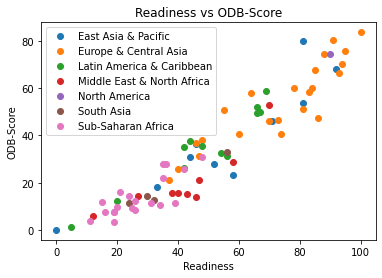

In [11]:
groups = merged.groupby("Region")
for name, group in groups:
    plt.plot(group["Readiness-Scaled"], group["ODB-Score-Scaled"], marker="o", linestyle="", label=name)
plt.title('Readiness vs ODB-Score')
plt.xlabel('Readiness')
plt.ylabel('ODB-Score')
plt.legend()

In [20]:
opendata16 = pd.read_csv("Resources/odb_2016.csv")
egov16 = pd.read_csv("Resources/EGOV_DATA_2016.csv")

In [23]:
opendata16["Country"] = opendata16["Country"].astype(str)
opendata16["Country"] = opendata16["Country"].str.strip()
egov16["Country Name"] = egov16["Country Name"].astype(str)
egov16["Country Name"] = egov16["Country Name"].str.strip()
merged16 = pd.merge(opendata16, egov16, left_on="Country", right_on="Country Name", how="inner")
merged16 = merged16.drop(columns=["Country Name","Survey Year","Unnamed: 0"])

In [24]:
merged16

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,North America,CA,CAN,2,Canada,89.54,96,87,66,...,63,90,43,8,14,0.82847,0.91525,0.95652,0.85717,0.67173
1,2016,Europe & Central Asia,FR,FRA,3,France,85.13,100,77,70,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,2016,North America,US,USA,4,United States of America,81.62,96,84,63,...,55,70,62,9,12,0.84201,0.89831,0.92754,0.88155,0.71696
3,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,85,79,76,...,45,75,61,11,2,0.91428,0.98305,0.97826,1.00000,0.76459
4,2016,East Asia & Pacific,NZ,NZL,7,New Zealand,79.38,92,53,63,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2016,Sub-Saharan Africa,MZ,MOZ,110,Mozambique,3.46,14,9,10,...,0,0,0,104,172,0.23050,0.20339,0.20290,0.38930,0.09929
98,2016,Sub-Saharan Africa,ML,MLI,111,Mali,2.46,12,8,10,...,0,0,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492
99,2016,Sub-Saharan Africa,ZW,ZWE,111,Zimbabwe,1.87,9,7,10,...,0,0,0,115,134,0.34722,0.28814,0.26087,0.56412,0.21666
100,2016,East Asia & Pacific,MM,MMR,113,Myanmar,1.33,2,8,15,...,10,0,0,85,169,0.23619,0.10169,0.15942,0.48365,0.06551


In [25]:
merged16.to_csv('Resources\merged2016.csv', index=False)
